In [1]:
import pandas as pd
import numpy as np
import random


# Set a seed for reproducibility
np.random.seed(42)

# Define the number of customers
num_customers = 1000

# Generate dummy customer data
customer_data = pd.DataFrame({
    "CustomerID": range(1, num_customers + 1),
    "Age": np.random.randint(18, 70, num_customers),  # Random ages between 18 and 70
    "Gender": np.random.choice(["Male", "Female"], num_customers, p=[0.5, 0.5]),
    "AnnualIncome": np.random.randint(20000, 150000, num_customers),  # Annual income in USD
    "PurchaseAmount": np.random.randint(50, 5000, num_customers),  # Amount spent on purchases
    "PurchaseFrequency": np.random.randint(1, 12, num_customers),  # Purchases per month
    "WebsiteVisits": np.random.randint(1, 50, num_customers),  # Monthly website visits
    "TimeOnSite": np.random.uniform(1, 20, num_customers).round(2),  # Average time on site in minutes
    "BounceRate": np.random.uniform(0, 100, num_customers).round(2)  # Bounce rate as a percentage
})

customer_data.head()



,CustomerID,Age,Gender,AnnualIncome,PurchaseAmount,PurchaseFrequency,WebsiteVisits,TimeOnSite,BounceRate
0,1,56,Female,122747,3607,11,6,11.28,53.33
1,2,69,Male,75922,695,9,19,12.50,40.56
2,3,46,Male,68231,3040,9,38,5.19,16.92
3,4,32,Male,49301,1949,6,28,12.89,97.75
4,5,60,Male,111652,2554,6,2,11.86,85.33


In [2]:

# List of random states in Nigeria
nigerian_states = [
    "Lagos", "Abuja", "Kano", "Rivers", "Kaduna", "Oyo", "Enugu", 
    "Edo", "Delta", "Borno", "Kogi", "Benue", "Ekiti", "Ogun", "Ondo", 
    "Osun", "Anambra", "Cross River", "Abia", "Imo"
]

# Update the dataset to include states and remove annual income
customer_data["State"] = np.random.choice(nigerian_states, num_customers)
customer_data = customer_data.drop(columns=["AnnualIncome"])

customer_data.head()

,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,WebsiteVisits,TimeOnSite,BounceRate,State
0,1,56,Female,3607,11,6,11.28,53.33,Borno
1,2,69,Male,695,9,19,12.50,40.56,Osun
2,3,46,Male,3040,9,38,5.19,16.92,Edo
3,4,32,Male,1949,6,28,12.89,97.75,Delta
4,5,60,Male,2554,6,2,11.86,85.33,Delta


In [3]:
# Generate random dates within the year 2024
np.random.seed(42)  # For reproducibility
customer_data['Date'] = pd.to_datetime(
    np.random.choice(pd.date_range('2024-01-01', '2024-12-31'), len(customer_data))
)


customer_data.head()



,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,WebsiteVisits,TimeOnSite,BounceRate,State,Date
0,1,56,Female,3607,11,6,11.28,53.33,Borno,2024-04-12
1,2,69,Male,695,9,19,12.50,40.56,Osun,2024-12-14
2,3,46,Male,3040,9,38,5.19,16.92,Edo,2024-09-27
3,4,32,Male,1949,6,28,12.89,97.75,Delta,2024-04-16
4,5,60,Male,2554,6,2,11.86,85.33,Delta,2024-03-12


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerID         1000 non-null   int64         
 1   Age                1000 non-null   int32         
 2   Gender             1000 non-null   object        
 3   PurchaseAmount     1000 non-null   int32         
 4   PurchaseFrequency  1000 non-null   int32         
 5   WebsiteVisits      1000 non-null   int32         
 6   TimeOnSite         1000 non-null   float64       
 7   BounceRate         1000 non-null   float64       
 8   State              1000 non-null   object        
 9   Date               1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(2)
memory usage: 62.6+ KB


In [5]:
# Save the dataset to a CSV file
customer_data.to_csv("customer_segmentation.csv", index=False)

print("Dataset saved successfully as 'customer_segmentation.csv'.")


Dataset saved successfully as 'customer_segmentation.csv'.


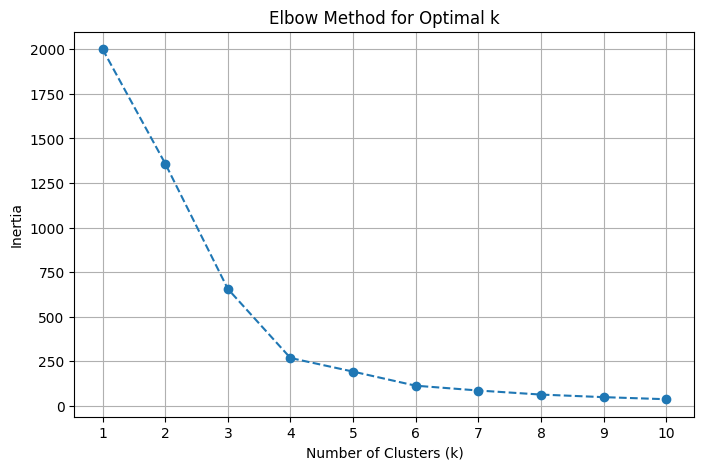

In [6]:
#demographic segmentation
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the Gender column (Male: 0, Female: 1)
label_encoder = LabelEncoder()
customer_data['GenderEncoded'] = label_encoder.fit_transform(customer_data['Gender'])

# Select features for demographic segmentation
demographic_features = customer_data[["Age", "GenderEncoded"]]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(demographic_features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)  # Test k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid()
plt.show()


In [7]:
# From visual inspection, let's choose k=3 as a reasonable elbow point
optimal_k = 3

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataset
cluster_centers = kmeans.cluster_centers_

# Analyze cluster sizes
cluster_sizes = customer_data["Cluster"].value_counts()

# Display cluster centers and sizes
cluster_summary = pd.DataFrame(cluster_centers, columns=["Age (scaled)", "GenderEncoded (scaled)"])
cluster_summary["Size"] = cluster_sizes.values
cluster_summary.reset_index(drop=True, inplace=True)

customer_data.head()


,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,WebsiteVisits,TimeOnSite,BounceRate,State,Date,GenderEncoded,Cluster
0,1,56,Female,3607,11,6,11.28,53.33,Borno,2024-04-12,0,2
1,2,69,Male,695,9,19,12.50,40.56,Osun,2024-12-14,1,0
2,3,46,Male,3040,9,38,5.19,16.92,Edo,2024-09-27,1,0
3,4,32,Male,1949,6,28,12.89,97.75,Delta,2024-04-16,1,0
4,5,60,Male,2554,6,2,11.86,85.33,Delta,2024-03-12,1,0


<Figure size 1000x600 with 0 Axes>

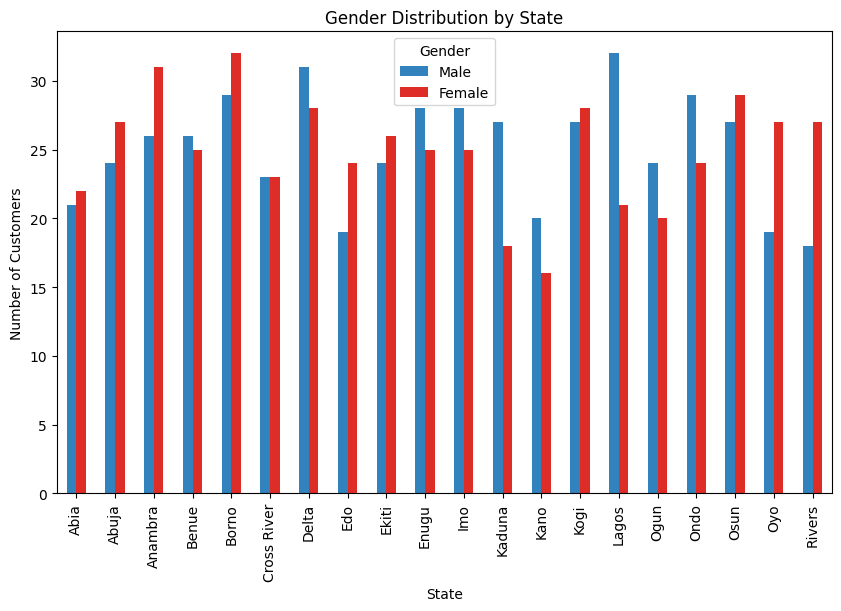

In [8]:
# 1. Gender Distribution by State (Bar Chart)
plt.figure(figsize=(10, 6))
gender_state = customer_data.groupby(['State', 'Gender']).size().unstack()
gender_state.plot(kind='bar', stacked=False, color=['#3182bd', '#de2d26'], figsize=(10, 6))
plt.title('Gender Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.legend(['Male', 'Female'], title='Gender')
plt.savefig('gender.png')
plt.show()

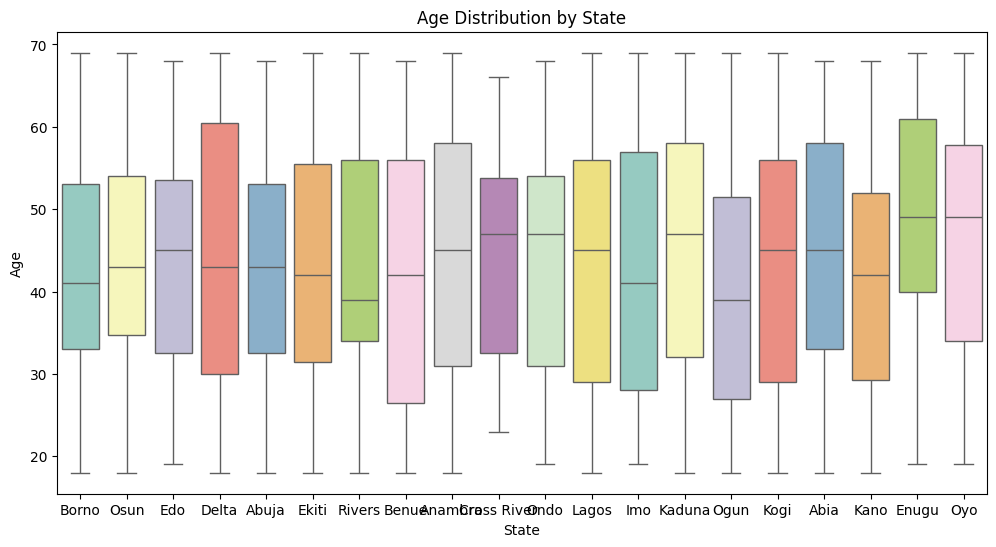

In [9]:
# 2. Age Distribution by State (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Age', data=customer_data, hue ='State', palette='Set3')
plt.title('Age Distribution by State')
plt.xlabel('State')
plt.ylabel('Age')
plt.show()

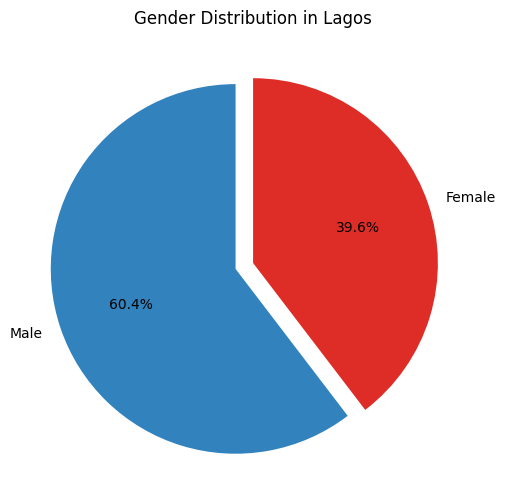

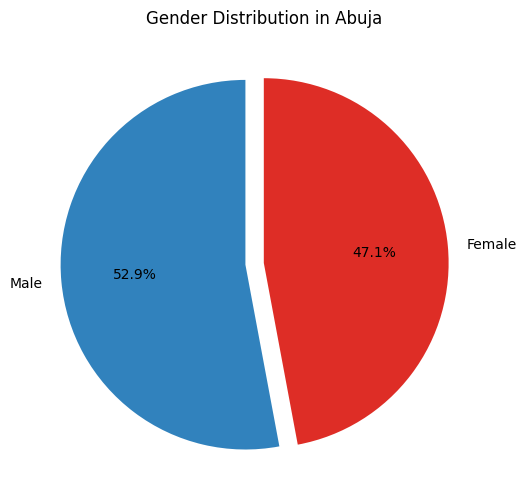

In [10]:
import matplotlib.pyplot as plt

# Filter data for Lagos
lagos_data = customer_data[customer_data['State'] == 'Lagos']
lagos_gender_counts = lagos_data['Gender'].value_counts()
lagos_labels = ['Male', 'Female']
lagos_colors = ['#3182bd', '#de2d26']  # Colors for Male and Female
lagos_explode = [0.1, 0]  # Slightly "explode" the Male slice

# Pie chart for Lagos
plt.figure(figsize=(6, 6))
lagos_gender_counts.plot.pie(
    autopct='%1.1f%%',
    labels=lagos_labels,
    explode=lagos_explode,
    colors=lagos_colors,
    startangle=90
)
plt.title('Gender Distribution in Lagos')
plt.ylabel('')  # Remove y-axis label for pie chart
plt.show()

# Filter data for Abuja
abuja_data = customer_data[customer_data['State'] == 'Abuja']
abuja_gender_counts = abuja_data['Gender'].value_counts()
abuja_labels = ['Male', 'Female']
abuja_colors = ['#3182bd', '#de2d26']
abuja_explode = [0.1, 0]

# Pie chart for Abuja
plt.figure(figsize=(6, 6))
abuja_gender_counts.plot.pie(
    autopct='%1.1f%%',
    labels=abuja_labels,
    explode=abuja_explode,
    colors=abuja_colors,
    startangle=90
)
plt.title('Gender Distribution in Abuja')
plt.ylabel('')
plt.show()


In [11]:
# Define age bins and labels
bins = [0, 18, 30, 45, 60, 100]  # Age ranges
labels = ['Under 18', 'Youth (18-30)', 'Young Adults (30-45)', 'Middle-aged (45-60)', 'Senior (60+)']

# Create a new column 'Age Group'
customer_data['Age Group'] = pd.cut(customer_data['Age'], bins=bins, labels=labels, right=False)

# Display a sample of the dataset with the new column
print(customer_data[['Age', 'Age Group']].head())

# Verify the counts in each age group for analysis
age_group_counts = customer_data['Age Group'].value_counts()
print(age_group_counts)


   Age             Age Group
0   56   Middle-aged (45-60)
1   69          Senior (60+)
2   46   Middle-aged (45-60)
3   32  Young Adults (30-45)
4   60          Senior (60+)
Age Group
Middle-aged (45-60)     299
Young Adults (30-45)    285
Youth (18-30)           222
Senior (60+)            194
Under 18                  0
Name: count, dtype: int64


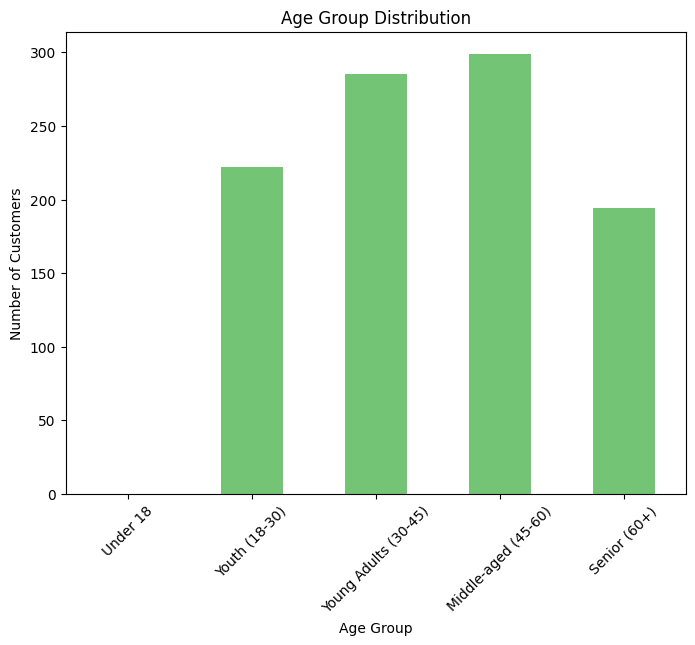

In [12]:


# Plot age group distribution
plt.figure(figsize=(8, 6))
age_group_counts.sort_index().plot(kind='bar', color='#74c476')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.savefig('age.png')
plt.show()


In [13]:
# Save the dataset to a CSV file
customer_data.to_csv("customer_segmentation00.csv", index=False)

print("Dataset saved successfully as 'customer_segmentation00.csv'.")

Dataset saved successfully as 'customer_segmentation00.csv'.
